# Required Libraries

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

%matplotlib inline
# Set the display format for floating-point numbers to scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Load Dataset

**Data Dictionary:**

* index - Unique Identifier for each row
* trans_date_trans_time - Transaction DateTime
* cc_num - Credit Card Number of Customer
* merchant - Merchant Name
* category - Category of Merchant
* amt - Amount of Transaction
* first - First Name of Credit Card Holder
* last - Last Name of Credit Card Holder
* gender - Gender of Credit Card Holder
* street - Street Address of Credit Card Holder
* city - City of Credit Card Holder
* state - State of Credit Card Holder
* zip - Zip of Credit Card Holder
* lat - Latitude Location of Credit Card Holder
* long - Longitude Location of Credit Card Holder
* city_pop - Credit Card Holder's City Population
* job - Job of Credit Card Holder
* dob - Date of Birth of Credit Card Holder
* trans_num - Transaction Number
* unix_time - UNIX Time of transaction
* merch_lat - Latitude Location of Merchant
* merch_long - Longitude Location of Merchant
* is_fraud - Fraud Flag <--- Target Class

In [3]:
train_data = pd.read_csv("raw_data/fraudTrain.csv")
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test_data = pd.read_csv("raw_data/fraudTest.csv")
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# EDA

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
train_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

From this all the columns are non-nulls

## Checking Categories

In [7]:
train_data["category"].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [8]:
train_data[train_data["is_fraud"] == 1]["category"].value_counts()

category
grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: count, dtype: int64

In [9]:
categories_fraudulent_index = train_data[train_data["is_fraud"] == 1]["category"].value_counts().index
categories_fraudulent_values = train_data[train_data["is_fraud"] == 1]["category"].value_counts().values

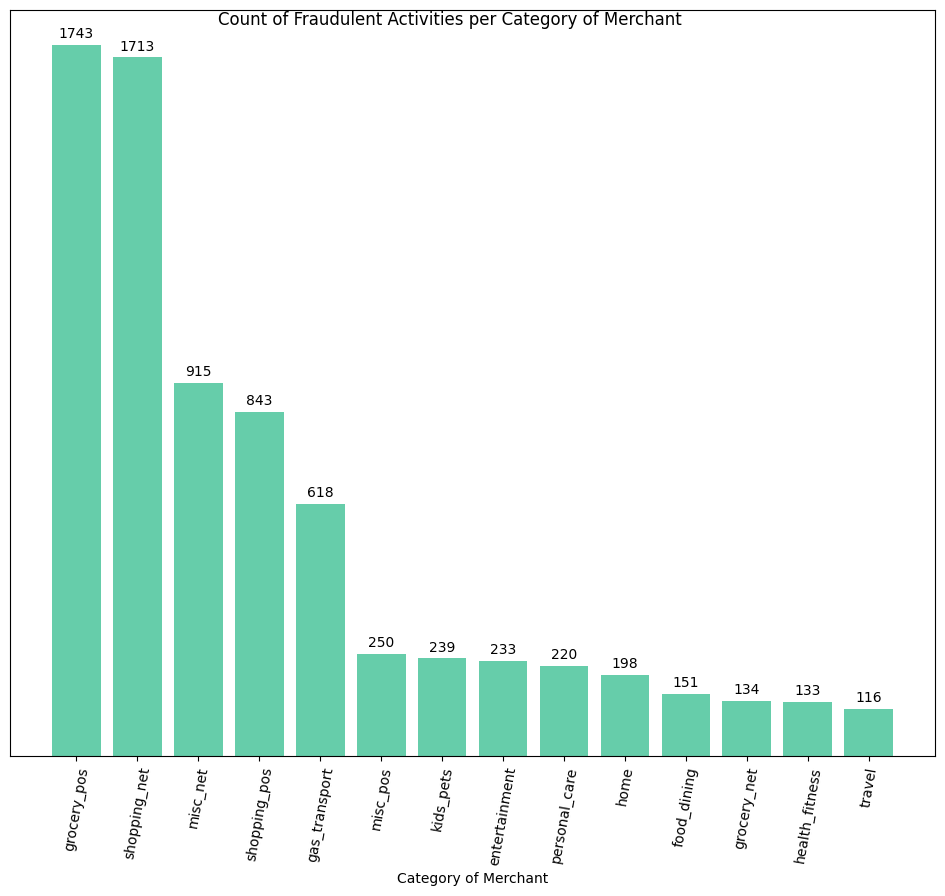

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(x=categories_fraudulent_index, height=categories_fraudulent_values, color = "mediumaquamarine")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 10,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
        #fontweight="bold",
    )
plt.tight_layout()
fig.suptitle("Count of Fraudulent Activities per Category of Merchant")
plt.xlabel("Category of Merchant")
plt.xticks(rotation = 80)
plt.ylabel("")
plt.yticks([])
plt.show()

More fraudulent activities are done in grocery stores and internet shopping

In [11]:
categories_fraudulent_values = train_data[train_data["is_fraud"] == 1]["category"].sum.values

AttributeError: 'function' object has no attribute 'values'

In [55]:
amounts_lost = train_data[train_data["is_fraud"]==1].groupby("category").agg({"amt": lambda x: x.sum()}).sort_values(ascending=True, by="amt").reset_index()
amounts_lost

,category,amt
0,travel,1051.49
1,grocery_net,1629.82
2,health_fitness,2693.04
3,kids_pets,4331.08
4,personal_care,5757.52
5,gas_transport,7594.11
6,food_dining,18131.62
7,home,50971.66
8,misc_pos,54571.02
9,entertainment,117323.79


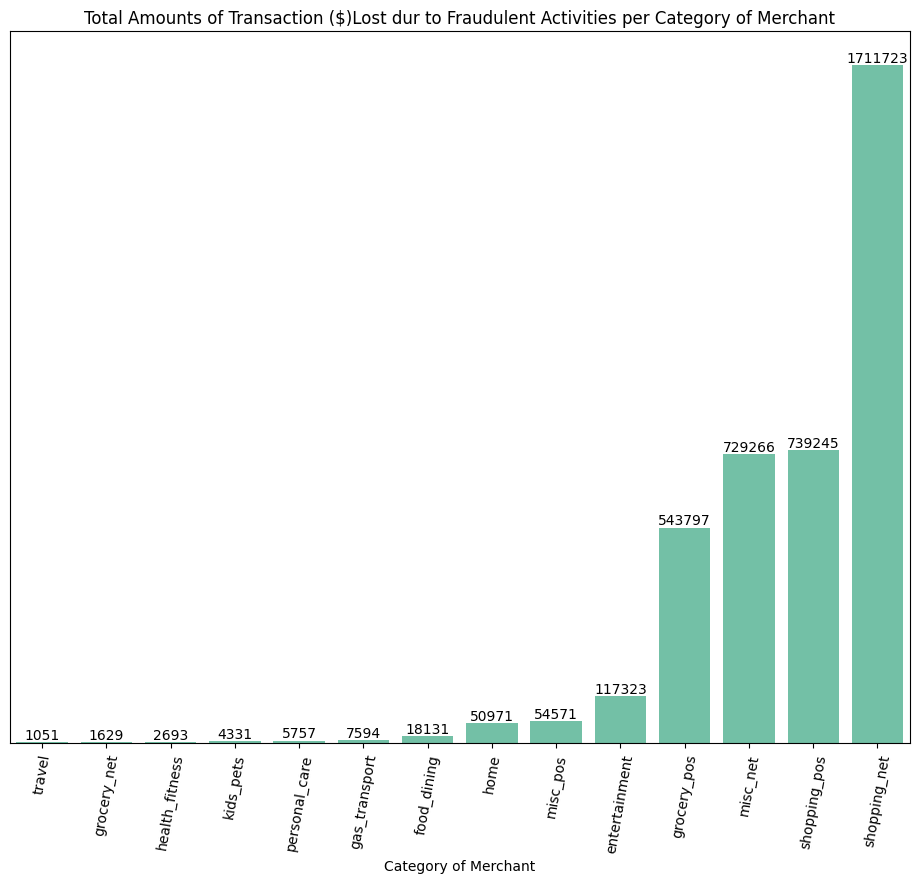

In [59]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(
    data=amounts_lost,
    x="category",
    y="amt",
    color="mediumaquamarine",
)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 10,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
        # fontweight="bold",
    )
plt.tight_layout()
plt.title("Total Amounts of Transaction ($)Lost dur to Fraudulent Activities per Category of Merchant")
plt.xlabel("Category of Merchant")
plt.xticks(rotation=80)
plt.ylabel("")
plt.yticks([])
plt.show()

* Most amount was lost shopping online.
* misc_net and shopping_pos have similar amounts lost due to fraudulent activities
* travel has the least amount lost to fraudulent activity

## Money Lost due to fraud

In [33]:
amount_per_is_fraud = train_data.groupby("is_fraud").agg(
    {"amt": lambda x: x.sum()}
).reset_index()

amount_per_is_fraud

,is_fraud,amt
0,0,87234340.29
1,1,3988088.61


In [47]:
fraud_amount = amount_per_is_fraud[amount_per_is_fraud["is_fraud"]==1]["amt"].values
non_fraud_amount = amount_per_is_fraud[amount_per_is_fraud["is_fraud"] == 0]["amt"].values
total_amount = fraud_amount + non_fraud_amount
fraud_amount, non_fraud_amount, total_amount

(array([3988088.61]), array([87234340.28999999]), array([91222428.89999999]))

In [49]:
100*fraud_amount/total_amount, 100*non_fraud_amount/total_amount

(array([4.37182901]), array([95.62817099]))

4.4% ($ 3 988 088.61)of the total amount was lost due to fraudulent activities

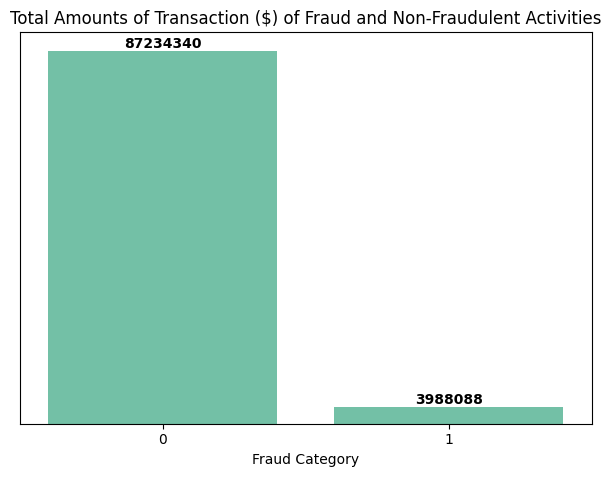

In [60]:
fig, ax = plt.subplots()
sns.barplot(data=amount_per_is_fraud, x = "is_fraud", y="amt", color="mediumaquamarine")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 10,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
        fontweight="bold",
    )
plt.tight_layout()
plt.title("Total Amounts of Transaction ($) of Fraud and Non-Fraudulent Activities")
plt.xlabel("Fraud Category")
plt.ylabel("")
plt.yticks([])
plt.show()

## Check if the data is balanced

In [9]:
train_data["is_fraud"].value_counts(normalize=True)*100

is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64

This dataset is heavily imbalanced, with fraud cases (i.e. represented as 1) being about 0.579% and cases with not fraud (i.e. represented as 0) being 99.421%

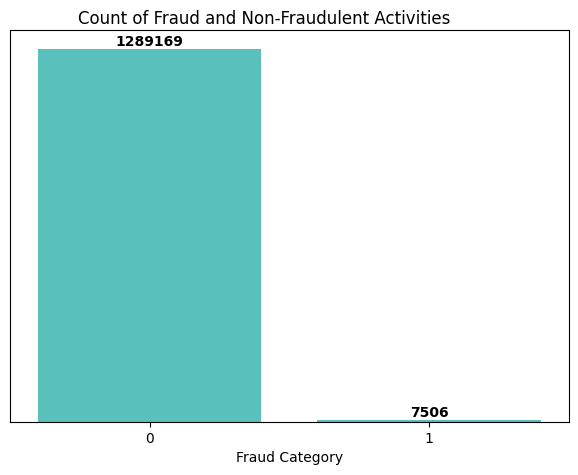

In [20]:
fig, ax = plt.subplots()
sns.countplot(data=train_data, x="is_fraud", color = "mediumturquoise")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 10,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
        fontweight="bold",
    )
plt.tight_layout()
fig.suptitle("Count of Fraud and Non-Fraudulent Activities")
plt.xlabel("Fraud Category")
plt.ylabel("")
plt.yticks([])
plt.show()

## Seasonality in the data

In [64]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])

In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [69]:
x = train_data["trans_date_trans_time"].values
y = train_data["amt"].values

In [76]:
fraud_df = train_data[train_data["is_fraud"] == 1][["trans_date_trans_time","amt"]]
fraud_x = fraud_df["trans_date_trans_time"].values
fraud_y = fraud_df["amt"].values

In [77]:
non_fraud_df = train_data[train_data["is_fraud"] == 0][["trans_date_trans_time", "amt"]]
non_fraud_x = non_fraud_df["trans_date_trans_time"].values
non_fraud_y = non_fraud_df["amt"].values

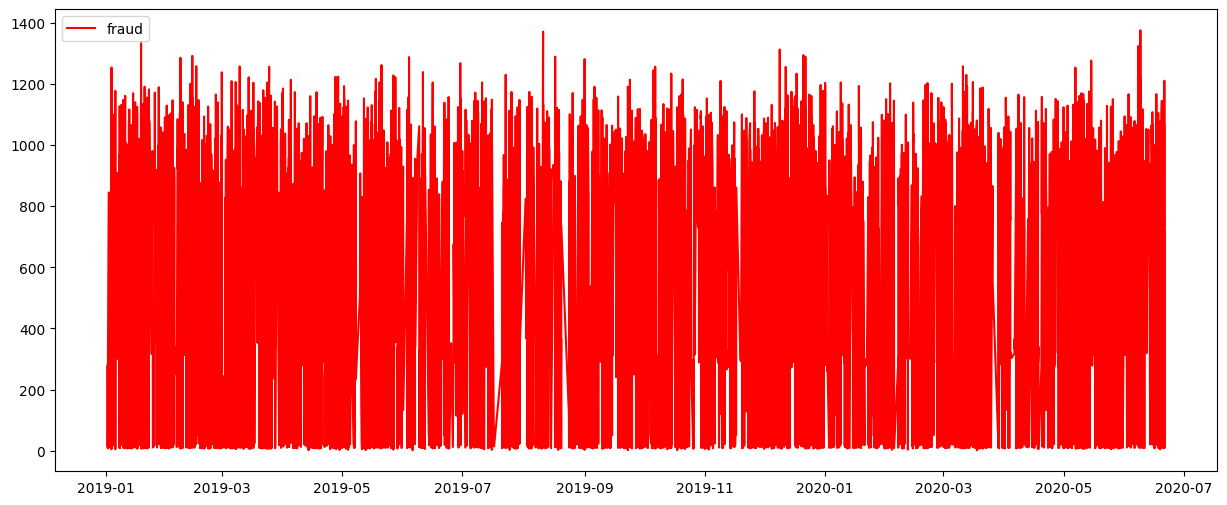

In [80]:
plt.figure(figsize=(15, 6))
plt.plot(fraud_x, fraud_y, color="red", label="fraud")
#plt.plot(non_fraud_x, non_fraud_y, color="green", label="non-fraud")
plt.legend()
plt.show()

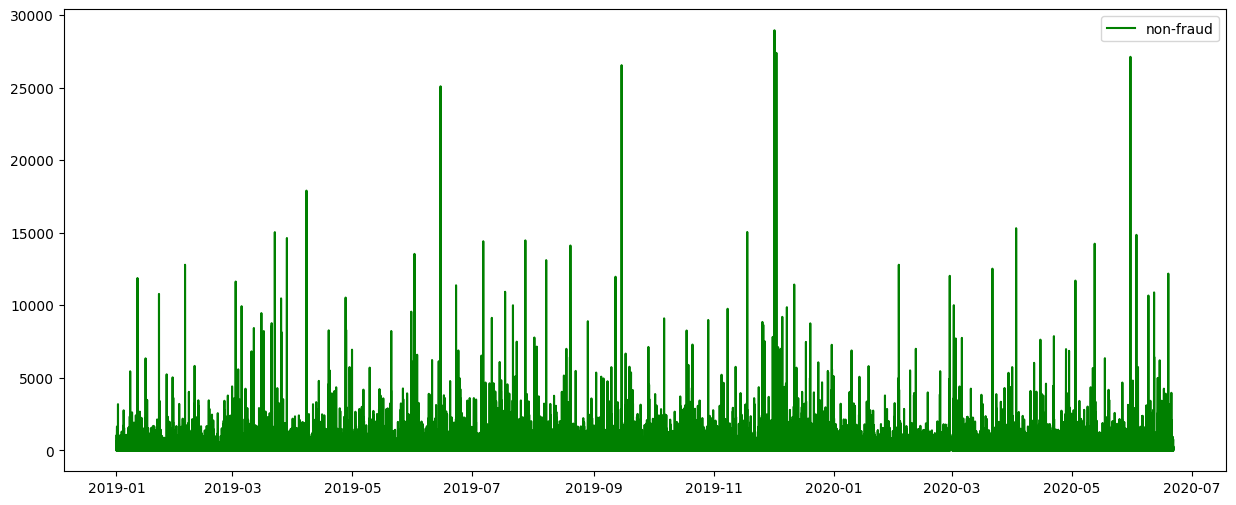

In [79]:
plt.figure(figsize=(15, 6))
#plt.plot(fraud_x, fraud_y, color="red", label="fraud")
plt.plot(non_fraud_x, non_fraud_y, color="green", label="non-fraud")
plt.legend()
plt.show()

* Not much conclusion can be drawn here besides that the fraudulent activities happened across the entire period of the dataset

**Add Month, Day and Year to the Fraud Dataframe**

In [100]:
fraud_df["month"] = fraud_df["trans_date_trans_time"].dt.month
fraud_df["day"] = fraud_df["trans_date_trans_time"].dt.day
fraud_df["year"] = fraud_df["trans_date_trans_time"].dt.year
fraud_df["day_of_week"] = fraud_df["trans_date_trans_time"].dt.day_name()

In [85]:
fraud_df

,trans_date_trans_time,amt,month,day,year
2449,2019-01-02 01:06:37,281.06,1,2,2019
2472,2019-01-02 01:47:29,11.52,1,2,2019
2523,2019-01-02 03:05:23,276.31,1,2,2019
2546,2019-01-02 03:38:03,7.03,1,2,2019
2553,2019-01-02 03:55:47,275.73,1,2,2019
...,...,...,...,...,...
1295399,2020-06-21 01:00:08,977.01,6,21,2020
1295491,2020-06-21 01:53:35,1210.91,6,21,2020
1295532,2020-06-21 02:16:56,10.24,6,21,2020
1295666,2020-06-21 03:26:20,21.69,6,21,2020


In [88]:
fraud_amount_per_month = fraud_df.groupby("month").agg({"amt": lambda x:x.sum()}).reset_index()
fraud_amount_per_month

,month,amt
0,1,444375.74
1,2,458001.19
2,3,471727.69
3,4,354241.27
4,5,497775.49
5,6,358434.41
6,7,188701.59
7,8,203951.13
8,9,217675.37
9,10,257739.72


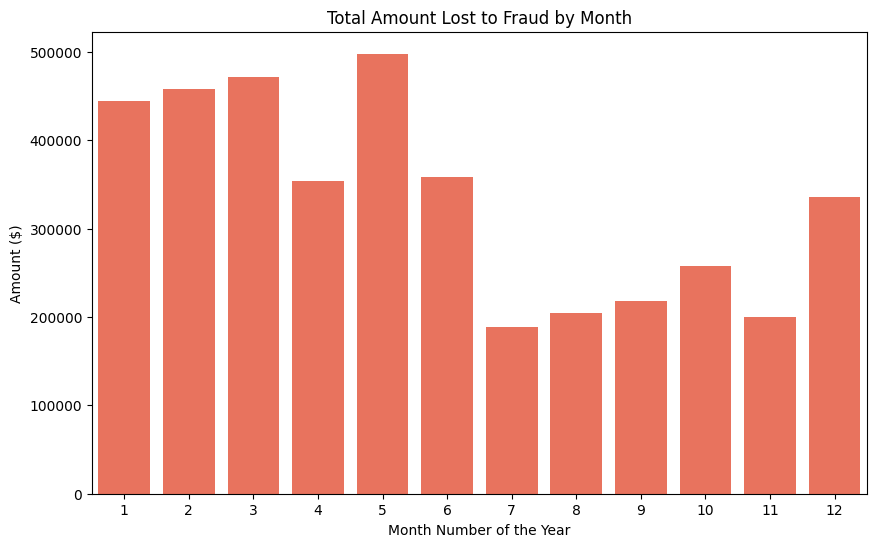

In [93]:
plt.figure(figsize=(10,6))
sns.barplot(data=fraud_amount_per_month, x="month", y="amt", color = "tomato")
plt.xlabel("Month Number of the Year")
plt.ylabel("Amount ($)")
plt.title("Total Amount Lost to Fraud by Month")
plt.show()

* Most Fraud amount was lost in first half of the year compare to the second half

In [97]:
fraud_amount_per_day = fraud_df.groupby("day").agg({"amt": lambda x: x.sum()}).reset_index()
fraud_amount_per_day.sort_values(by="amt")

,day,amt
5,6,80580.37
4,5,89146.16
8,9,95770.67
26,27,101177.84
23,24,102114.67
30,31,104312.53
0,1,106810.24
25,26,108158.21
17,18,110460.95
21,22,110711.12


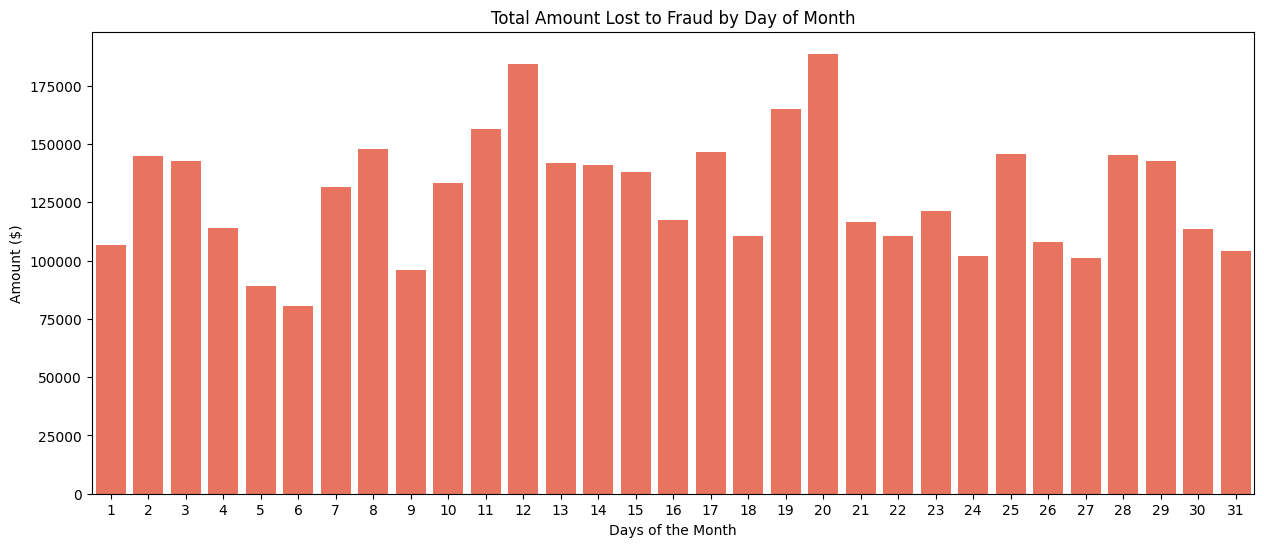

In [96]:
plt.figure(figsize=(15, 6))
sns.barplot(data=fraud_amount_per_day, x="day", y="amt", color="tomato")
plt.xlabel("Days of the Month")
plt.ylabel("Amount ($)")
plt.title("Total Amount Lost to Fraud by Day of Month")
plt.show()

* There are periods of increase followed by periods of decrease and then a repeat
* The 5 and 6 days of the month have the least number of fraudulent amounts.
* 12th and 20th are the days to refrain from shopping as there most number of frauds amounts then

In [102]:
fraud_amount_per_day_of_week = fraud_df.groupby("day_of_week").agg({"amt": lambda x: x.sum()}).reset_index()
fraud_amount_per_day_of_week.sort_values(by="amt")

,day_of_week,amt
6,Wednesday,449581.26
5,Tuesday,501650.80
4,Thursday,544490.00
0,Friday,581816.53
1,Monday,610146.66
2,Saturday,636539.35
3,Sunday,663864.01


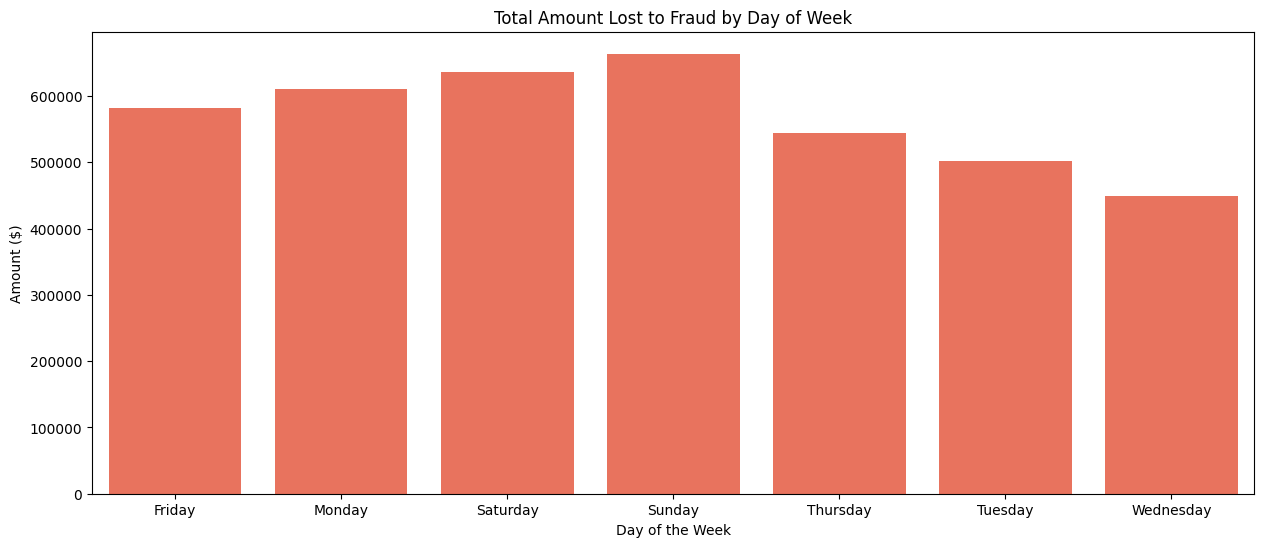

In [103]:
plt.figure(figsize=(15, 6))
sns.barplot(data=fraud_amount_per_day_of_week, x="day_of_week", y="amt", color="tomato")
plt.xlabel("Day of the Week")
plt.ylabel("Amount ($)")
plt.title("Total Amount Lost to Fraud by Day of Week")
plt.show()

* Sunday is the day with most amount lost to fraudulent activity
* Friday, Saturday, Sunday and Monday are the days where the fraudulent activities are high

## Target Group for Fraud

In [34]:
gender_stats = train_data[train_data["is_fraud"]==1][["gender","amt"]].groupby("gender").agg(
   count=("gender", "size"),  # Count of transactions
    amt=("amt", "sum")      # Sum of amounts
).reset_index()

gender_stats

,gender,count,amt
0,F,3735,1845287.34
1,M,3771,2142801.27


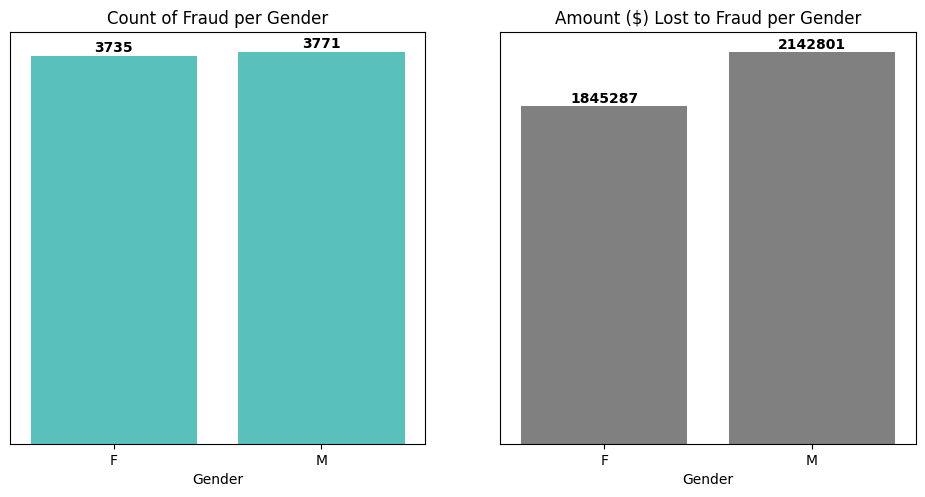

In [221]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.barplot(data=gender_stats, x="gender", y="count",color="mediumturquoise", ax=axs[0])
sns.barplot(data=gender_stats, x="gender", y="amt", color="gray", ax=axs[1])

for ax in axs:
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            height + 10,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=10,
            color="black",
            fontweight="bold",
        )
plt.tight_layout()
axs[0].set(title="Count of Fraud per Gender", xlabel="Gender", ylabel="", yticks=[])
axs[1].set(title="Amount ($) Lost to Fraud per Gender", xlabel="Gender", ylabel="", yticks=[])
plt.show()

* It looks the activities happens equally to both male and females although females have lost less money compared to males

## Target City

In [38]:
city_stats = train_data[train_data["is_fraud"] == 1][["city", "amt"]].groupby("city").agg(
        count=("city", "size"),  # Count of transactions
        amt=("amt", "sum"),  # Sum of amounts
    ).reset_index()

city_stats.head()

,city,count,amt
0,Achille,13,5354.25
1,Acworth,13,9221.61
2,Afton,9,4011.45
3,Albany,20,12850.38
4,Albuquerque,24,11722.84


In [67]:
cities_x_count = city_stats.sort_values(by="count", ascending=False)["city"]
cities_y_count = city_stats.sort_values(by="count", ascending=False)["count"]

cities_x_amt = city_stats.sort_values(by="amt", ascending=False)["city"]
cities_y_amt = city_stats.sort_values(by="amt", ascending=False)["amt"]

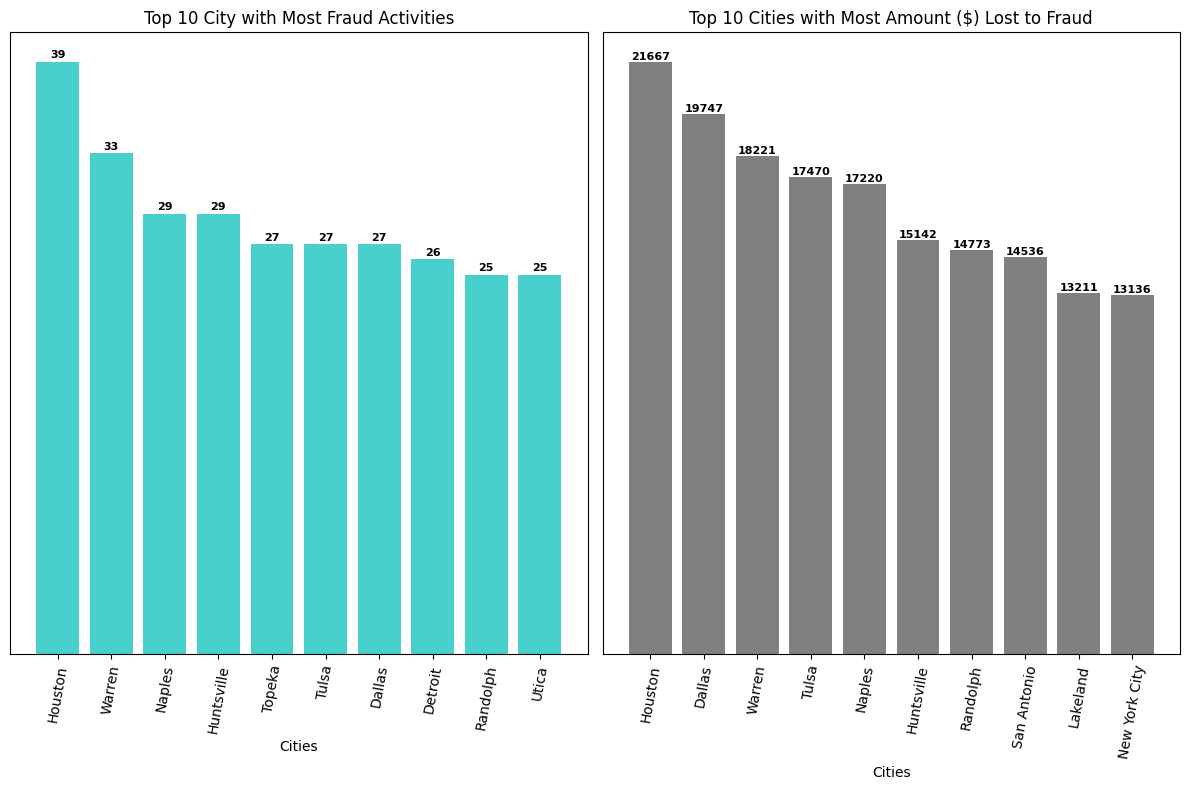

In [97]:
top_n = 10
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].bar(x=cities_x_count[:top_n], height=cities_y_count[:top_n], color="mediumturquoise")
axs[1].bar(x=cities_x_amt[:top_n], height=cities_y_amt[:top_n], color="gray")

for ax in axs:
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            height + 0.1,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=8,
            color="black",
            fontweight="bold",
        )
    # Rotate x-ticks
    ax.tick_params(axis="x", rotation=80)

axs[0].set(title=f"Top {top_n} City with Most Fraud Activities", xlabel="Cities", ylabel="", yticks=[])
axs[1].set(title=f"Top {top_n} Cities with Most Amount ($) Lost to Fraud", xlabel="Cities", ylabel="", yticks=[])

plt.tight_layout()
plt.show()

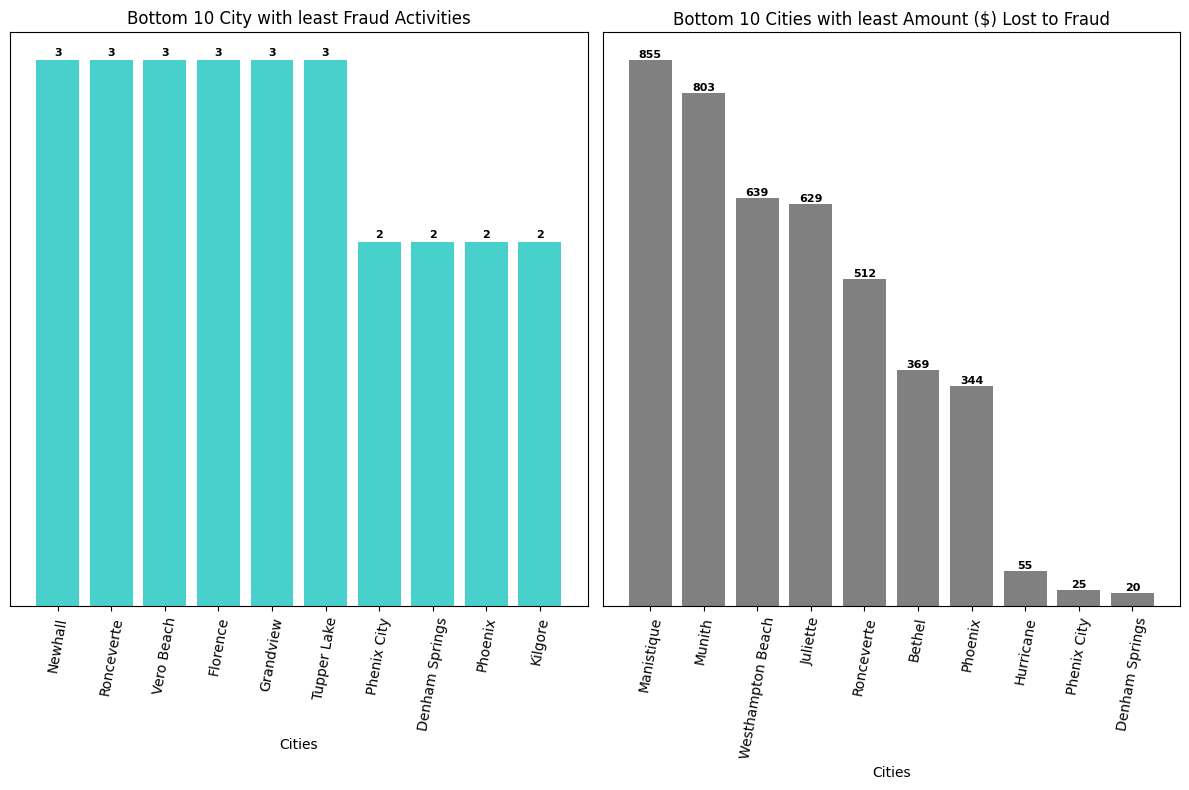

In [103]:
top_n = 10
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].bar(
    x=cities_x_count[-top_n:], height=cities_y_count[-top_n:], color="mediumturquoise"
)
axs[1].bar(x=cities_x_amt[-top_n:], height=cities_y_amt[-top_n:], color="gray")

for ax in axs:
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            height + 0.01,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=8,
            color="black",
            fontweight="bold",
        )
    # Rotate x-ticks
    ax.tick_params(axis="x", rotation=80)

axs[0].set(
    title=f"Bottom {top_n} City with least Fraud Activities",
    xlabel="Cities",
    ylabel="",
    yticks=[],
)
axs[1].set(
    title=f"Bottom {top_n} Cities with least Amount ($) Lost to Fraud",
    xlabel="Cities",
    ylabel="",
    yticks=[],
)

plt.tight_layout()
plt.show()

* ***Phenix City, Denham Springs, Phoenix and Kilgore*** have the least number of fraudulent activities compared to other cities
* If you are in ***Denham Springs and Phoniex City***, you are less likely to encounter fraudulent activies however if it happens you will loose very small amounts
* ***Houston*** is a city of Frauds! The highest number of frauds are recorded there and as well as the highest amount was lost there

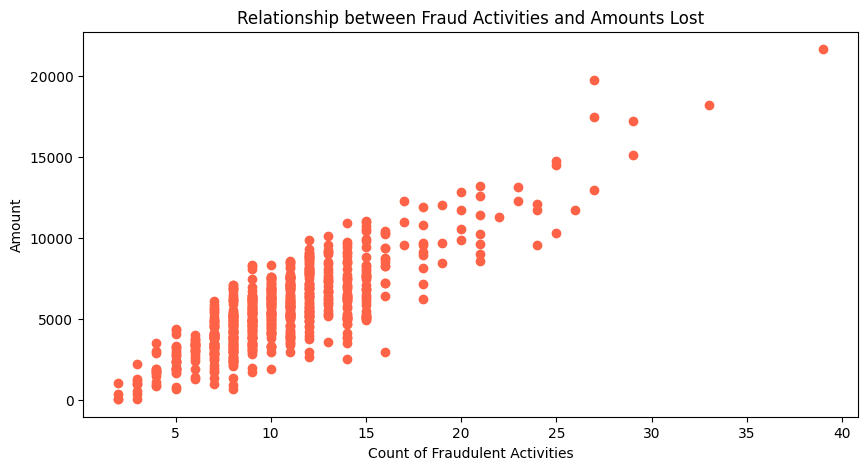

In [106]:
plt.figure(figsize=(10,5))
plt.scatter(city_stats["count"], city_stats["amt"], color="tomato")
plt.xlabel("Count of Fraudulent Activities")
plt.ylabel("Amount")
plt.title("Relationship between Fraud Activities and Amounts Lost")
plt.show()

* As number of fraudulent activities increases, the amount lost increases.
* Therefore if you are in Houston (where many activities are), you are most likely to lose your money due to fraud

## Target State

In [107]:
state_stats = train_data[train_data["is_fraud"] == 1][["state", "amt"]].groupby("state").agg(
        count=("state", "size"),  # Count of transactions
        amt=("amt", "sum"),  # Sum of amounts
    ).reset_index()

state_stats.head()

,state,count,amt
0,AK,36,18578.67
1,AL,215,112596.99
2,AR,161,81139.81
3,AZ,37,18333.62
4,CA,326,170943.92


In [108]:
state_x_count = state_stats.sort_values(by="count", ascending=False)["state"]
state_y_count = state_stats.sort_values(by="count", ascending=False)["count"]

state_x_amt = state_stats.sort_values(by="amt", ascending=False)["state"]
state_y_amt = state_stats.sort_values(by="amt", ascending=False)["amt"]

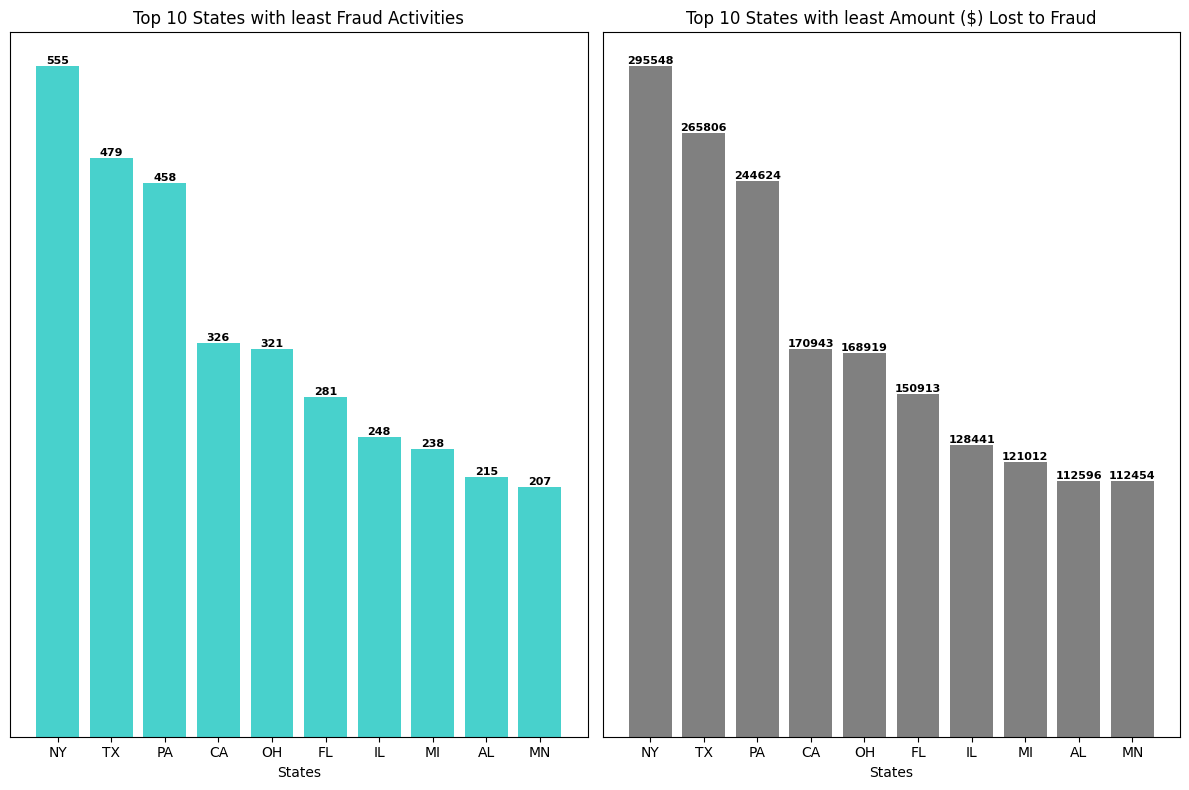

In [116]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].bar(x=state_x_count[:top_n], height=state_y_count[:top_n], color="mediumturquoise")
axs[1].bar(x=state_x_amt[:top_n], height=state_y_amt[:top_n], color="gray")

for ax in axs:
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            height + 0.01,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=8,
            color="black",
            fontweight="bold",
        )
    # Rotate x-ticks
    ax.tick_params(axis="x", rotation=0)

axs[0].set(
    title=f"Top {top_n} States with least Fraud Activities",
    xlabel="States",
    ylabel="",
    yticks=[],
)
axs[1].set(
    title=f"Top {top_n} States with least Amount ($) Lost to Fraud",
    xlabel="States",
    ylabel="",
    yticks=[],
)

plt.tight_layout()
plt.show()

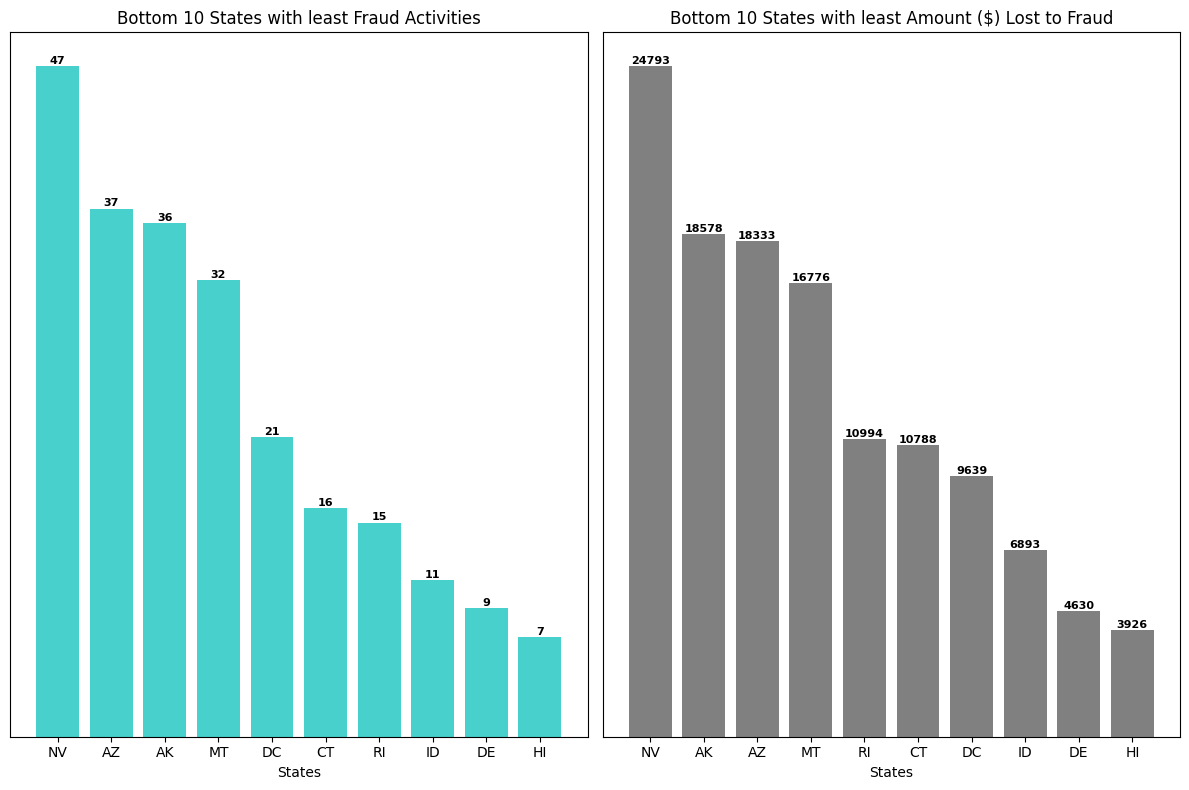

In [117]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].bar(x=state_x_count[-top_n:], height=state_y_count[-top_n:], color="mediumturquoise")
axs[1].bar(x=state_x_amt[-top_n:], height=state_y_amt[-top_n:], color="gray")

for ax in axs:
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            height + 0.01,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=8,
            color="black",
            fontweight="bold",
        )
    # Rotate x-ticks
    ax.tick_params(axis="x", rotation=0)

axs[0].set(
    title=f"Bottom {top_n} States with least Fraud Activities",
    xlabel="States",
    ylabel="",
    yticks=[],
)
axs[1].set(
    title=f"Bottom {top_n} States with least Amount ($) Lost to Fraud",
    xlabel="States",
    ylabel="",
    yticks=[],
)

plt.tight_layout()
plt.show()

* HI is a state least fradulent activities and the one with least amount lost to fraud, as well.
* NY is a state with most fraudulent activities and the most amount lost to fraud.

## Highlight Worst and Better Cities in each State

In [156]:
state_city_amt = train_data[train_data["is_fraud"]==1][["city","state","amt", "is_fraud"]].groupby("city").agg(
    {"state":"first", "amt":"sum"}
).reset_index()

state_city_amt.head()

,city,state,amt
0,Achille,OK,5354.25
1,Acworth,NH,9221.61
2,Afton,MN,4011.45
3,Albany,NY,12850.38
4,Albuquerque,NM,11722.84


In [168]:
state_city_amt["state"].nunique()

50

In [161]:
state_city_amt[state_city_amt["state"]=="AL"]

,city,state,amt
60,Birmingham,AL,5944.61
72,Brantley,AL,8154.66
151,Dadeville,AL,8892.06
193,Eldridge,AL,6000.89
202,Fairhope,AL,7571.37
220,Gadsden,AL,3217.94
236,Grand Bay,AL,6389.56
240,Grant,AL,3833.09
295,Huntsville,AL,15142.79
314,Jones,AL,3452.85


In [164]:
n_city = 1
bottom_n_cities_per_state = state_city_amt.groupby("state").apply(lambda x: x.nsmallest(n_city, "amt")).reset_index(drop=True)

bottom_n_cities_per_state.head()

C:\Users\Dnemauluma\AppData\Local\Temp\ipykernel_27176\2431131034.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_n_cities_per_state = state_city_amt.groupby("state").apply(lambda x: x.nsmallest(n_city, "amt")).reset_index(drop=True)


,city,state,amt
0,Huslia,AK,4580.10
1,Phenix City,AL,25.40
2,Bauxite,AR,883.71
3,Phoenix,AZ,344.74
4,Sun City,CA,882.67


In [165]:
top_n_cities_per_state = (
    state_city_amt.groupby("state")
    .apply(lambda x: x.nlargest(n_city, "amt"))
    .reset_index(drop=True)
)

top_n_cities_per_state.head()

C:\Users\Dnemauluma\AppData\Local\Temp\ipykernel_27176\4287612920.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_city_amt.groupby("state")


,city,state,amt
0,Kaktovik,AK,7807.28
1,Huntsville,AL,15142.79
2,Walnut Ridge,AR,8243.35
3,Mesa,AZ,11711.42
4,San Diego,CA,9690.25


In [182]:
top_states = top_n_cities_per_state["state"].values
top_city = top_n_cities_per_state["city"].values

grouped_texts = defaultdict(list)
for state, city in zip(top_states, top_city):
    grouped_texts[state].append(city)

In [183]:
bottom_states = bottom_n_cities_per_state["state"].values
bottom_city = bottom_n_cities_per_state["city"].values

grouped_texts_bottom = defaultdict(list)
for state, city in zip(bottom_states, bottom_city):
    grouped_texts_bottom[state].append(city)

In [185]:
def plot_bubble(data_dict, title):
    # Convert to a DataFrame
    cities_data = []
    for state, cities in data_dict.items():
        for city in cities:
            cities_data.append({"State": state, "City": city})

    df = pd.DataFrame(cities_data)

    # Create a bubble chart
    plt.figure(figsize=(20, 2))

    # Count the number of cities per state for bubble size
    size = df["State"].value_counts().reindex(df["State"]).fillna(0)

    # Create the bubble chart
    plt.scatter(
        df["State"], [1] * len(df), s=size * 100, alpha=0.5, edgecolors="w", linewidth=2, color = "w"
    )

    # Customize the plot
    plt.title(title)
    plt.xlabel("State")
    plt.yticks([])  # Remove y-ticks
    plt.grid(False)

    # Annotate the bubbles with city names
    for i, row in df.iterrows():
        plt.annotate(row["City"], (row["State"], 1), fontsize=9, ha="center", va="center", rotation=80)

    plt.show()

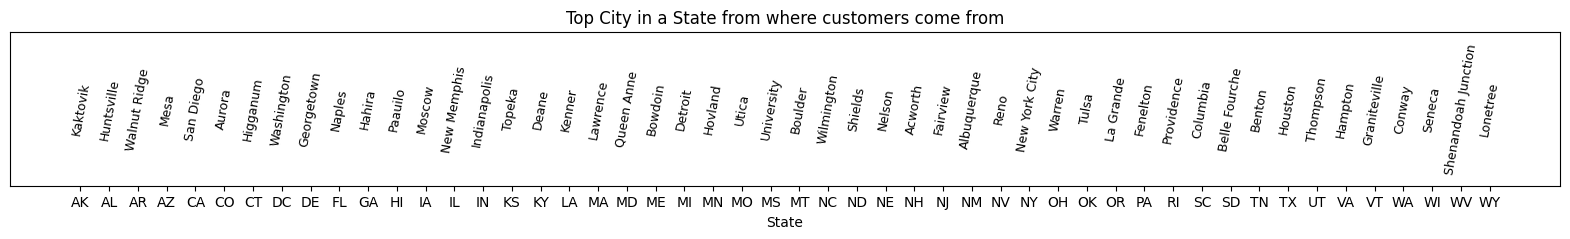

In [186]:
plot_bubble(data_dict=grouped_texts, title="Top City in a State from where customers come from")

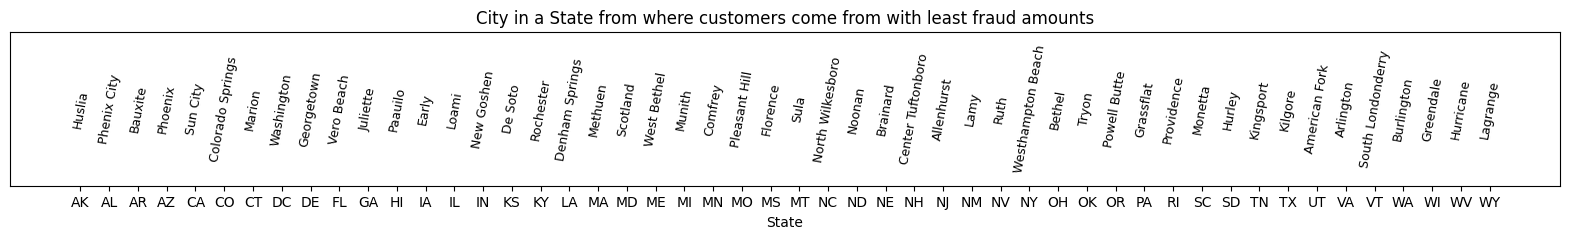

In [187]:
plot_bubble(
    data_dict=grouped_texts_bottom, title="City in a State from where customers come from with least fraud amounts"
)

## City Population Vs Fraud Activities

In [125]:
train_data[train_data["is_fraud"]==1][["city", "city_pop", "amt"]]

,city,city_pop,amt
2449,Collettsville,885,281.06
2472,San Antonio,1595797,11.52
2523,San Antonio,1595797,276.31
2546,Collettsville,885,7.03
2553,San Antonio,1595797,275.73
...,...,...,...
1295399,Vero Beach,105638,977.01
1295491,Vero Beach,105638,1210.91
1295532,Denham Springs,71335,10.24
1295666,Notrees,23,21.69


In [127]:
city_population = train_data[train_data["is_fraud"] == 1][["city", "city_pop", "amt"]].groupby("city").agg(
    {"amt": "sum", "city_pop":"first"}
).reset_index()

city_population.head()

,city,amt,city_pop
0,Achille,5354.25,608
1,Acworth,9221.61,477
2,Afton,4011.45,2916
3,Albany,12850.38,151022
4,Albuquerque,11722.84,641349


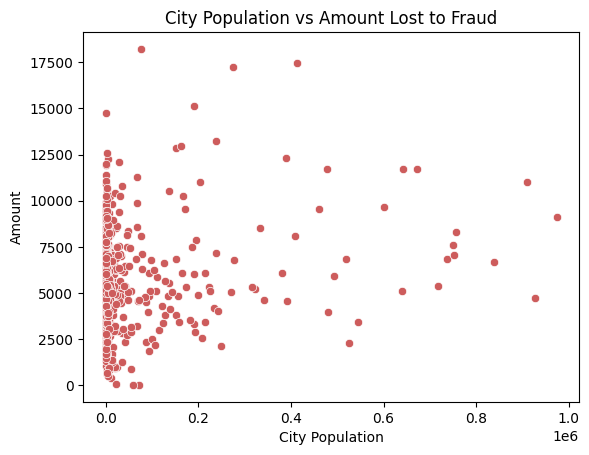

In [152]:
sns.scatterplot(data=city_population[city_population["city_pop"]<=1000000], x="city_pop", y="amt", color="indianred")
plt.xlabel("City Population")
plt.ylabel("Amount")
plt.title("City Population vs Amount Lost to Fraud")
plt.show()

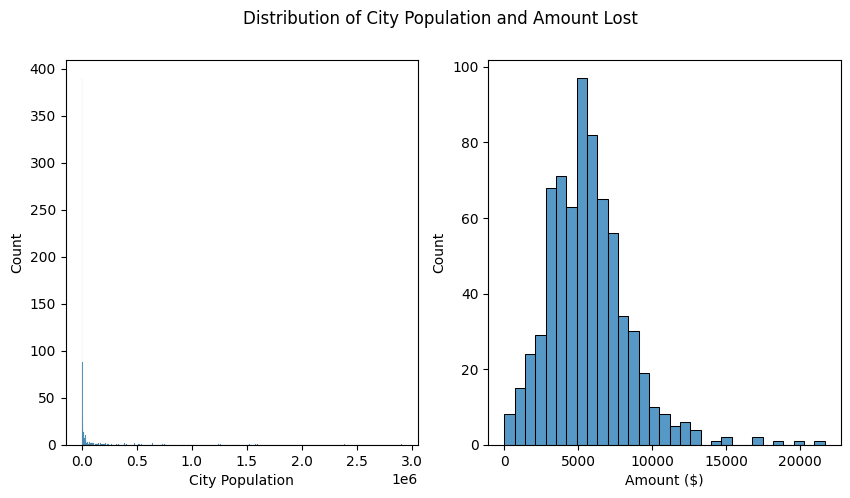

In [140]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=city_population,x="city_pop", ax=ax1)
sns.histplot(data=city_population, x="amt", ax=ax2)
ax1.set(xlabel="City Population")
ax2.set(xlabel="Amount ($)")
fig.suptitle("Distribution of City Population and Amount Lost")
plt.show()

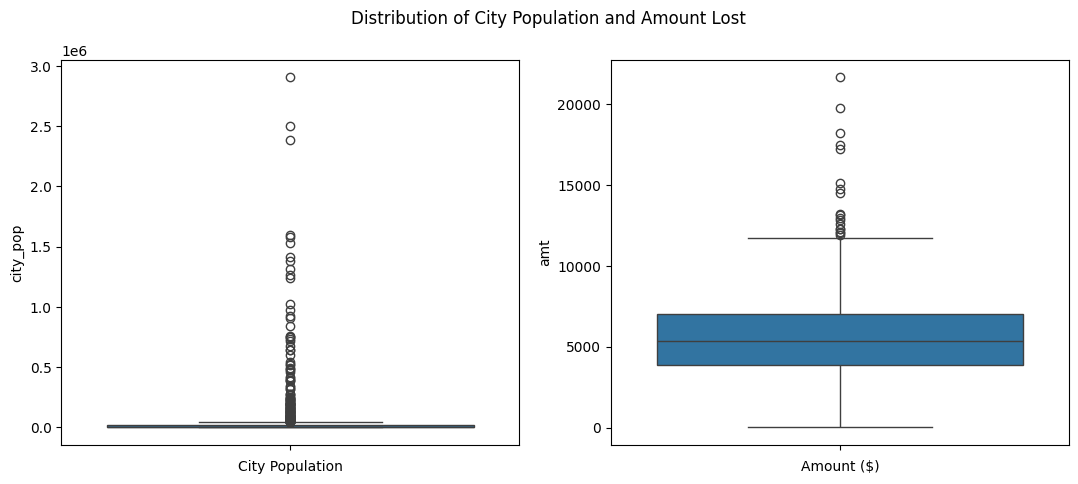

In [143]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
sns.boxplot(data=city_population, y="city_pop", ax=ax1)
sns.boxplot(data=city_population, y="amt", ax=ax2)
ax1.set(xlabel="City Population")
ax2.set(xlabel="Amount ($)")
fig.suptitle("Distribution of City Population and Amount Lost")
plt.show()

In [147]:
city_fraud_count = train_data[train_data["is_fraud"] == 1][["city", "city_pop", "amt"]].groupby("city").agg(
    {"amt": "size", "city_pop": "first"}).reset_index()

city_fraud_count.head()

,city,amt,city_pop
0,Achille,13,608
1,Acworth,13,477
2,Afton,9,2916
3,Albany,20,151022
4,Albuquerque,24,641349


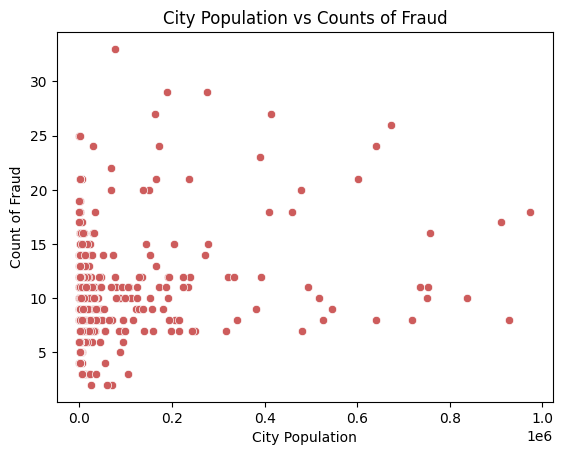

In [151]:
sns.scatterplot(
    data=city_fraud_count[city_fraud_count["city_pop"] <= 1000000],
    x="city_pop",
    y="amt",
    color="indianred",
)
plt.xlabel("City Population")
plt.ylabel("Count of Fraud")
plt.title("City Population vs Counts of Fraud")
plt.show()

* Majority of the cities have less than 10 000 credit card customers who have experienced fraud
* It is not conclusive that as population increase, fraud amounts and counts increases
* However at densely populated areas, number of fraud cases are few compared to sparsely populated areas

## Descriptive Stats

In [197]:
train_data[train_data["is_fraud"]==1][["amt"]].describe()

,amt
count,7506.00
mean,531.32
std,390.56
min,1.06
25%,245.66
50%,396.50
75%,900.88
max,1376.04


In [198]:
train_data[train_data["amt"]==1.06].shape

(471, 23)

In [199]:
train_data[train_data["amt"] == 1376.04].shape

(1, 23)

In [202]:
train_data[train_data["amt"] == 1376.04][["state", "city", "gender"]]

,state,city,gender
1262544,MD,Queen Anne,F


* Smallest amount lost to fraud is **$ 1.06** and that has happened 471 times
* largest amount was **$ 1 376.04** at a **shopping store (Shopping_POS)** in Queen Anne and a state of Maryland and it was a female customer

## Is there a state or city with no fraud activities?

In [206]:
cities_with_fraud = train_data[train_data["is_fraud"]==1]["city"].unique()
cities_without_fraud = train_data[train_data["is_fraud"] == 0]["city"].unique()

In [209]:
cities_where_no_fraud_was_committed = []
for city in cities_without_fraud:
    if city not in cities_with_fraud:
        cities_where_no_fraud_was_committed.append(city)
cities_where_no_fraud_was_committed[:10]

['Moravian Falls',
 'Orient',
 'Malad City',
 'Doe Hill',
 'Waukesha',
 'Honokaa',
 'Baton Rouge',
 'Chatham',
 'Roosevelt',
 'Jay']

In [210]:
len(cities_where_no_fraud_was_committed)

192

In [211]:
states_with_fraud = train_data[train_data["is_fraud"] == 1]["state"].unique()
states_without_fraud = train_data[train_data["is_fraud"] == 0]["state"].unique()

In [213]:
states_where_no_fraud_was_committed = []
for state in states_without_fraud:
    if state not in states_with_fraud:
        states_where_no_fraud_was_committed.append(state)
states_where_no_fraud_was_committed

[]

* Fraud was committed in all the states
* There are 192 cities where there was no fraud committed. Green cities to consider for relocation!!

## Jobs of customers

In [217]:
jobs_data = train_data[train_data["is_fraud"]==1][["job","amt"]]
jobs_data.head()

,job,amt
2449,Soil scientist,281.06
2472,Horticultural consultant,11.52
2523,Horticultural consultant,276.31
2546,Soil scientist,7.03
2553,Horticultural consultant,275.73


In [219]:
jobs_stats = jobs_data.groupby("job").agg(
    count=("job", "size"),
    amt=("amt","sum")
).reset_index()

jobs_stats.head()

,job,count,amt
0,Academic librarian,11,7042.12
1,"Accountant, chartered",11,5342.77
2,"Accountant, chartered certified",9,7192.92
3,"Accountant, chartered public finance",9,4696.62
4,Accounting technician,33,19985.88


In [225]:
jobs_x_count = jobs_stats.sort_values(by="count", ascending=False)["job"]
jobs_y_count = jobs_stats.sort_values(by="count", ascending=False)["count"]

jobs_x_amt = jobs_stats.sort_values(by="amt", ascending=False)["job"]
jobs_y_amt = jobs_stats.sort_values(by="amt", ascending=False)["amt"]

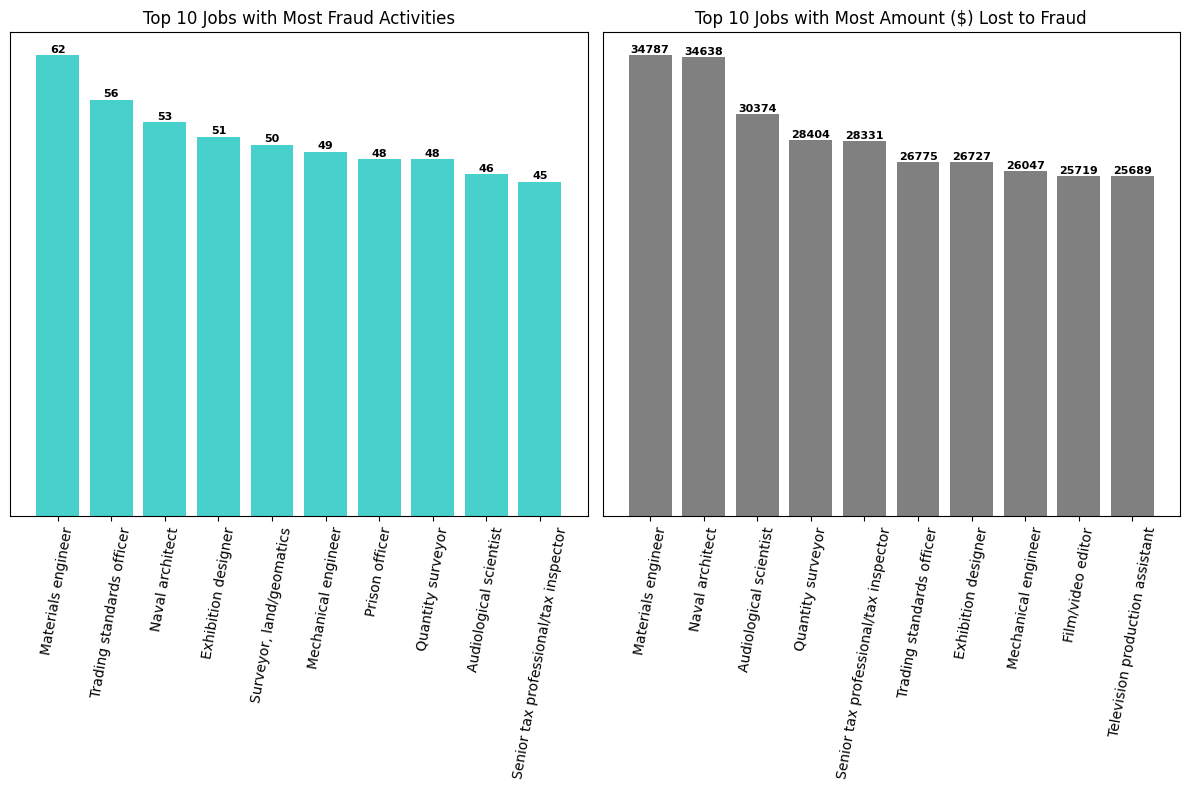

In [232]:
top_n = 10
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].bar(
    x=jobs_x_count[:top_n], height=jobs_y_count[:top_n], color="mediumturquoise"
)
axs[1].bar(x=jobs_x_amt[:top_n], height=jobs_y_amt[:top_n], color="gray")

for ax in axs:
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            height + 0.1,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=8,
            color="black",
            fontweight="bold",
        )
    # Rotate x-ticks
    ax.tick_params(axis="x", rotation=80)

axs[0].set(
    title=f"Top {top_n} Jobs with Most Fraud Activities",
    xlabel="",
    ylabel="",
    yticks=[],
)
axs[1].set(
    title=f"Top {top_n} Jobs with Most Amount ($) Lost to Fraud",
    xlabel="",
    ylabel="",
    yticks=[],
)

plt.tight_layout()
plt.show()

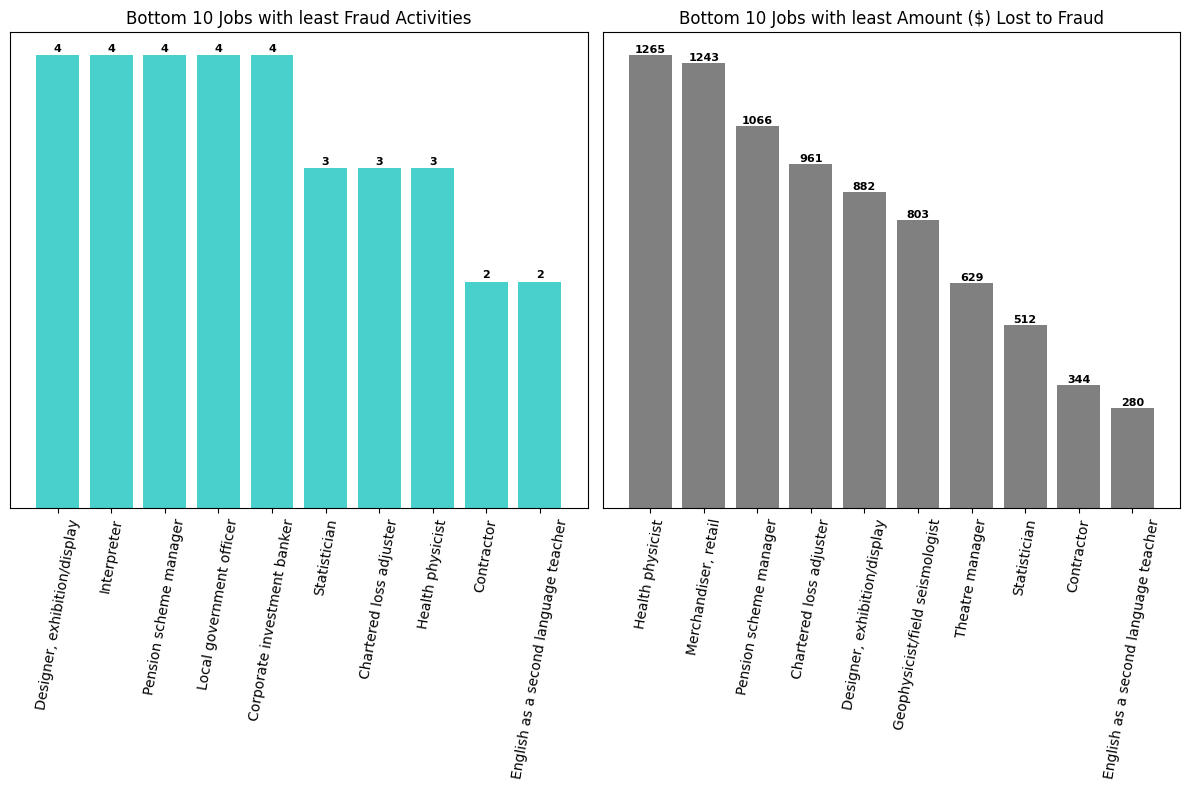

In [230]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].bar(x=jobs_x_count[-top_n:], height=jobs_y_count[-top_n:], color="mediumturquoise")
axs[1].bar(x=jobs_x_amt[-top_n:], height=jobs_y_amt[-top_n:], color="gray")

for ax in axs:
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            height + 0.01,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=8,
            color="black",
            fontweight="bold",
        )
    # Rotate x-ticks
    ax.tick_params(axis="x", rotation=80)

axs[0].set(
    title=f"Bottom {top_n} Jobs with least Fraud Activities",
    xlabel="",
    ylabel="",
    yticks=[],
)
axs[1].set(
    title=f"Bottom {top_n} Jobs with least Amount ($) Lost to Fraud",
    xlabel="",
    ylabel="",
    yticks=[],
)

plt.tight_layout()
plt.show()

* You are safe if you work as a **contractor** and **english as a second language teacher** because there are only two fraudulent activities
* **Materials Engineers** have suffered the most. They are a target!!
* **Materials Engineers** and **Naval Architect** has lost most money!! Two careers perhaps not to consider tho they earn more money...hahaha. On a serious note, if you are an either of these two careers. You ought to be vigilant when making transaction or everywhere you are!

## Age Distribution

In [236]:
train_data["dob"] = pd.to_datetime(train_data["dob"])

In [245]:
age_data = train_data[train_data["is_fraud"]==1][["dob","amt"]].copy()
reference_date = pd.to_datetime("2020-12-31")
age_data["age"] = (reference_date - age_data["dob"]).dt.days // 365
age_data.head()

,dob,amt,age
2449,1988-09-15,281.06,32
2472,1960-10-28,11.52,60
2523,1960-10-28,276.31,60
2546,1988-09-15,7.03,32
2553,1960-10-28,275.73,60


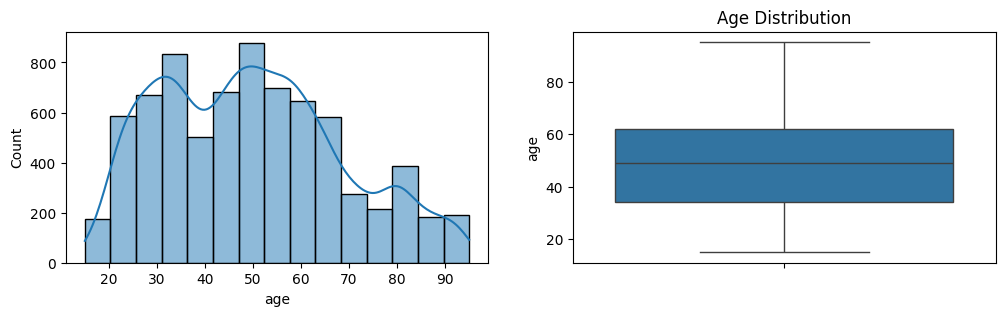

In [267]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,3))
sns.histplot(data=age_data, x="age", kde=True, bins=15, ax=ax1)
sns.boxplot(data=age_data, y="age", ax=ax2)
plt.title("Age Distribution")
plt.show()

In [255]:
age_data[["age","amt"]].describe()

,age,amt
count,7506.00,7506.00
mean,49.60,531.32
std,18.85,390.56
min,15.00,1.06
25%,34.00,245.66
50%,49.00,396.50
75%,62.00,900.88
max,95.00,1376.04


* Minimum age is 15 years old
* Maximum age is 95 years old
* average age is 49.6 years old
* 75% of customers are 62 years old

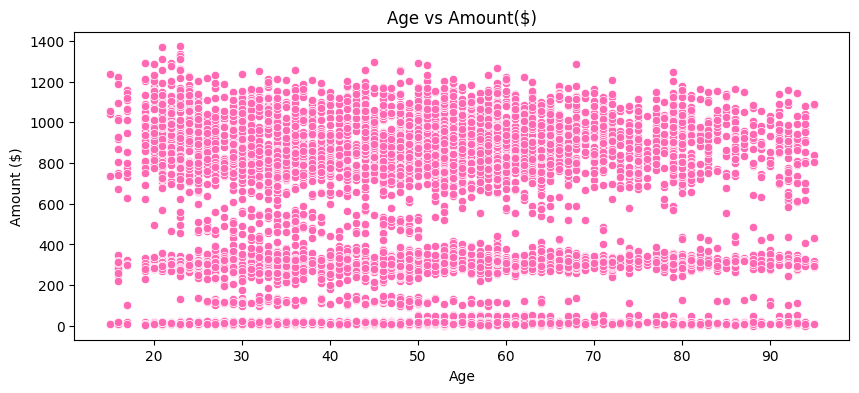

In [263]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=age_data, x="age", y="amt", color="hotpink")
plt.xlabel("Age")
plt.ylabel("Amount ($)")
plt.title("Age vs Amount($)")
plt.show()

* Fraud looks to happen similarly across all the ages

In [268]:
def age_buckets(age):
    if (age < 25):
        return "<25"
    if (age >= 25) and (age < 35):
        return "25-35"
    if (age >= 35) and (age < 45):
        return "35-45"
    if (age >= 45) and (age < 55):
        return "45-55"
    if (age >= 55) and (age < 65):
        return "55-65"
    if (age >= 65) and (age < 75):
        return "65-75"
    if (age >= 75) and (age < 85):
        return "75-85"
    if (age >= 85):
        return ">=85"

In [270]:
age_data["age_bucket"] = age_data["age"].apply(age_buckets)
age_data.head()

,dob,amt,age,age_bucket
2449,1988-09-15,281.06,32,25-35
2472,1960-10-28,11.52,60,55-65
2523,1960-10-28,276.31,60,55-65
2546,1988-09-15,7.03,32,25-35
2553,1960-10-28,275.73,60,55-65


In [273]:
age_bucket = age_data.groupby("age_bucket").agg(
    count=("age_bucket","size"),
    amt=("amt","sum")
).reset_index()

age_bucket

,age_bucket,count,amt
0,25-35,1399,708361.48
1,35-45,1150,557853.81
2,45-55,1463,736894.18
3,55-65,1305,721132.70
4,65-75,658,396451.03
5,75-85,541,309501.14
6,<25,617,360193.06
7,>=85,373,197701.21


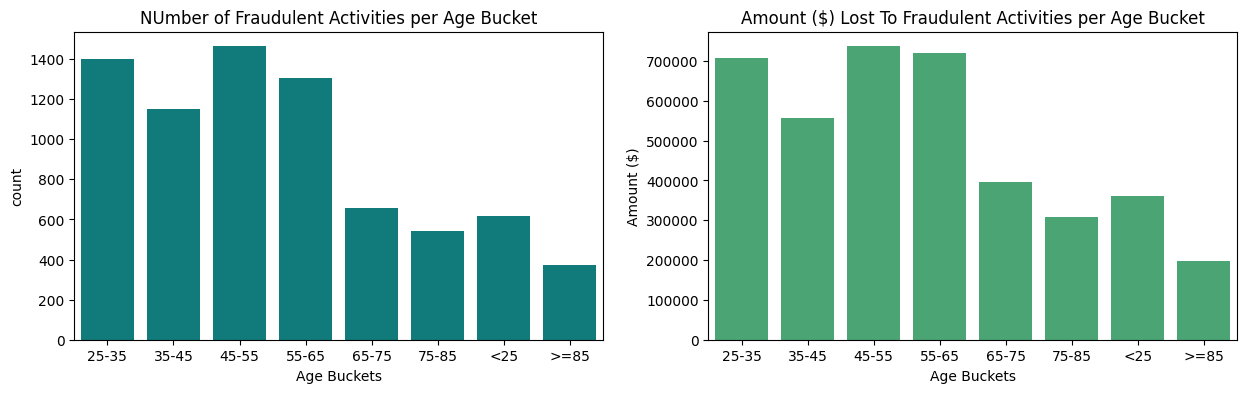

In [282]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
sns.barplot(data=age_bucket, x="age_bucket", y="count", color="darkcyan", ax=ax1)
sns.barplot(data=age_bucket, x="age_bucket", y="amt", color="mediumseagreen", ax=ax2)
ax1.set(xlabel="Age Buckets", title="NUmber of Fraudulent Activities per Age Bucket")
ax2.set(xlabel="Age Buckets", title="Amount ($) Lost To Fraudulent Activities per Age Bucket", ylabel="Amount ($)")
plt.show()

* Customers between 45 to 55 are target while customers over the age of 85 are less target 